In [11]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy import stats
import os
import anndata
import matplotlib.transforms as transforms


def nd(arr):
    return np.asarray(arr).reshape(-1)


fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [2]:
gene = anndata.read_h5ad("../../data/notebook/revision/10xv3_gene_tsne.h5ad")

In [44]:
cluster_cmap = {
"Astro": (0.38823529411764707, 0.4745098039215686,  0.2235294117647059 ),  # 637939,
"Endo" : (0.5490196078431373,  0.6352941176470588,  0.3215686274509804 ),  # 8ca252,
"SMC"  : (0.7098039215686275,  0.8117647058823529,  0.4196078431372549 ),  # b5cf6b,
"VLMC" : (0.807843137254902,   0.8588235294117647,  0.611764705882353  ),  # cedb9c,
"Low Quality" : (0,0,0),
"L2/3 IT" : (0.9921568627450981,  0.6823529411764706,  0.4196078431372549  ),  # fdae6b
"L5 PT" : (0.9921568627450981,  0.8156862745098039,  0.6352941176470588  ),  # fdd0a2
"L5 IT" : (0.5176470588235295,  0.23529411764705882, 0.2235294117647059 ),  # 843c39
"L5/6 NP": "#D43F3A",
"L6 CT" : (0.8392156862745098,  0.3803921568627451,  0.4196078431372549 ),  # d6616b
"L6 IT" : (0.9058823529411765,  0.5882352941176471,  0.611764705882353  ),  # e7969c
"L6b" : (1.0,                 0.4980392156862745,  0.054901960784313725),  # ff7f0e
"L6 IT Car3" : (1.0,                 0.7333333333333333,  0.47058823529411764 ),  # ffbb78
"Lamp5" : (0.19215686274509805, 0.5098039215686274,  0.7411764705882353  ),  # 3182bd # blues
"Sncg" : (0.4196078431372549,  0.6823529411764706,  0.8392156862745098  ),  # 6baed6
"Vip" : (0.6196078431372549,  0.792156862745098,   0.8823529411764706  ),  # 9ecae1
"Sst" : (0.7764705882352941,  0.8588235294117647,  0.9372549019607843  ),  # c6dbef
"Pvalb":(0.7372549019607844,  0.7411764705882353,  0.8627450980392157  ),  # bcbddc
}

batch_cmap = {
        '3L8TX_181211_01_A01': (0.38823529411764707, 0.4745098039215686,  0.2235294117647059 ),
        '4L8TX_181211_01_B01': (0.7098039215686275,  0.8117647058823529,  0.4196078431372549 ),
        '5L8TX_181211_01_C01': (0.9921568627450981,  0.6823529411764706,  0.4196078431372549  ),
        '6L8TX_181211_01_D01': (0.8392156862745098,  0.3803921568627451,  0.4196078431372549 ),
        '7L8TX_181211_01_E01': (1.0,                 0.4980392156862745,  0.054901960784313725),
        '8L8TX_181211_01_F01': (0.19215686274509805, 0.5098039215686274,  0.7411764705882353  ),
        '1L8TX_181211_01_G12': (0.6196078431372549,  0.792156862745098,   0.8823529411764706  ),
        '2L8TX_181211_01_H12': (0.7764705882352941,  0.8588235294117647,  0.9372549019607843  ),
        '9L8TX_190430_01_A08': (1.0,                 0.7333333333333333,  0.47058823529411764 ),
        '10L8TX_190430_01_B08':(0.9921568627450981,  0.8156862745098039,  0.6352941176470588  ),
        '11L8TX_190430_01_F08':(0.7372549019607844,  0.7411764705882353,  0.8627450980392157  ),
        '12L8TX_190430_01_G08':(0.4196078431372549,  0.6823529411764706,  0.8392156862745098  ),
}

cluster_order = [
    "Lamp5",
    "Sncg",
    "Vip",
    "Sst",
    "Pvalb",
    "L5 IT",
    "L5/6 NP",
    "L5 PT",
    "L2/3 IT",
    "L6b",
    "VLMC",
    "L6 IT",
    "L6 CT",
    "L6 IT Car3",
    "Endo",
    "Astro",
    "SMC",
    "Macrophage",
    "OPC",
    "Oligo",
    "doublet",
    "Low Quality"
]
cluster_cmap["doublet"] = (0.4588235294117647,  0.4196078431372549,  0.6941176470588235  )  # 756bb1
cluster_cmap["Macrophage"] =     (0.6196078431372549,  0.6039215686274509,  0.7843137254901961  )  # 9e9ac8
cluster_cmap["OPC"] =     (0.7372549019607844,  0.7411764705882353,  0.8627450980392157  )  # bcbddc
cluster_cmap["Oligo"] =     (0.8549019607843137,  0.8549019607843137,  0.9215686274509803  )  # dadaeb

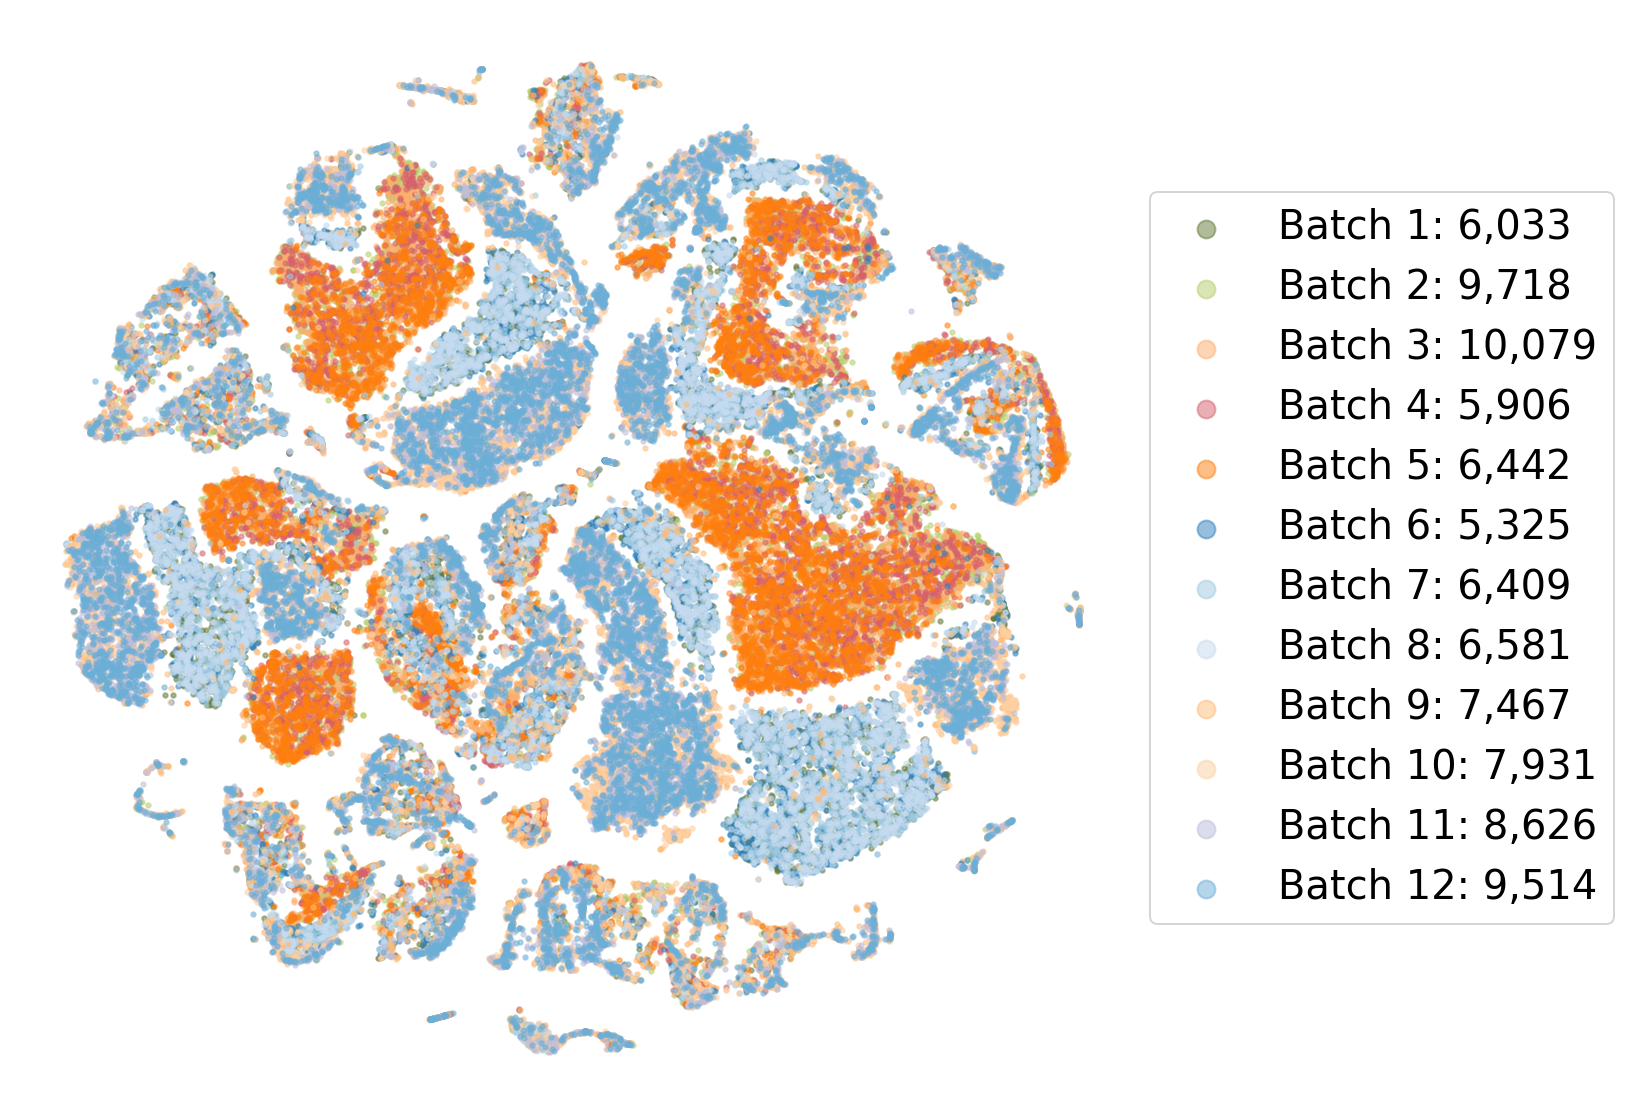

In [257]:
fig, ax = plt.subplots(figsize=(10,10))

c = gene.obs["batch"].unique().astype(str)
cmap = cm.get_cmap("tab20")

for idx, cluster in enumerate(c):
    XX = gene[gene.obs.batch == cluster,:].obsm["X_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    
    color = batch_cmap[cluster]
    
    ax.scatter(x, y, color = color, label=f"Batch {idx+1}"+": {:,}".format(x.shape[0]), alpha=0.5, s=5)
    

# handles, labels = ax.get_legend_handles_labels()
# idx = [np.where(c==i)[0][0] for i in cluster_order]
# handles = np.array(handles)[idx]
# labels=np.array(labels)[idx]

# ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=4)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale=4)
ax.set_axis_off()

plt.savefig("../../figures/10x_cluster_tsne_mixing.png",bbox_inches='tight', dpi=300)


plt.show()

# Cluster

In [247]:
s = gene.obs.groupby(["batch","cluster_label"])["batch"].count()

batches = np.sort(gene.obs.batch.unique())

n_clusters = gene.obs.cluster_label.nunique()
n_batches = len(batches)

mat = np.zeros((n_batches, n_clusters))
for bidx, b in enumerate(batches):
    mat[bidx,:] = s[b]

In [248]:
mat.shape

(12, 147)

In [249]:
a = np.matrix([[1, 2],[0,1],[1, 1]])
b = np.array([5,1, 1])
print(a)
print(a/b[:,None])

[[1 2]
 [0 1]
 [1 1]]
[[0.2 0.4]
 [0.  1. ]
 [1.  1. ]]


In [250]:
data = mat/mat.sum(axis=1)[:,None] * 100

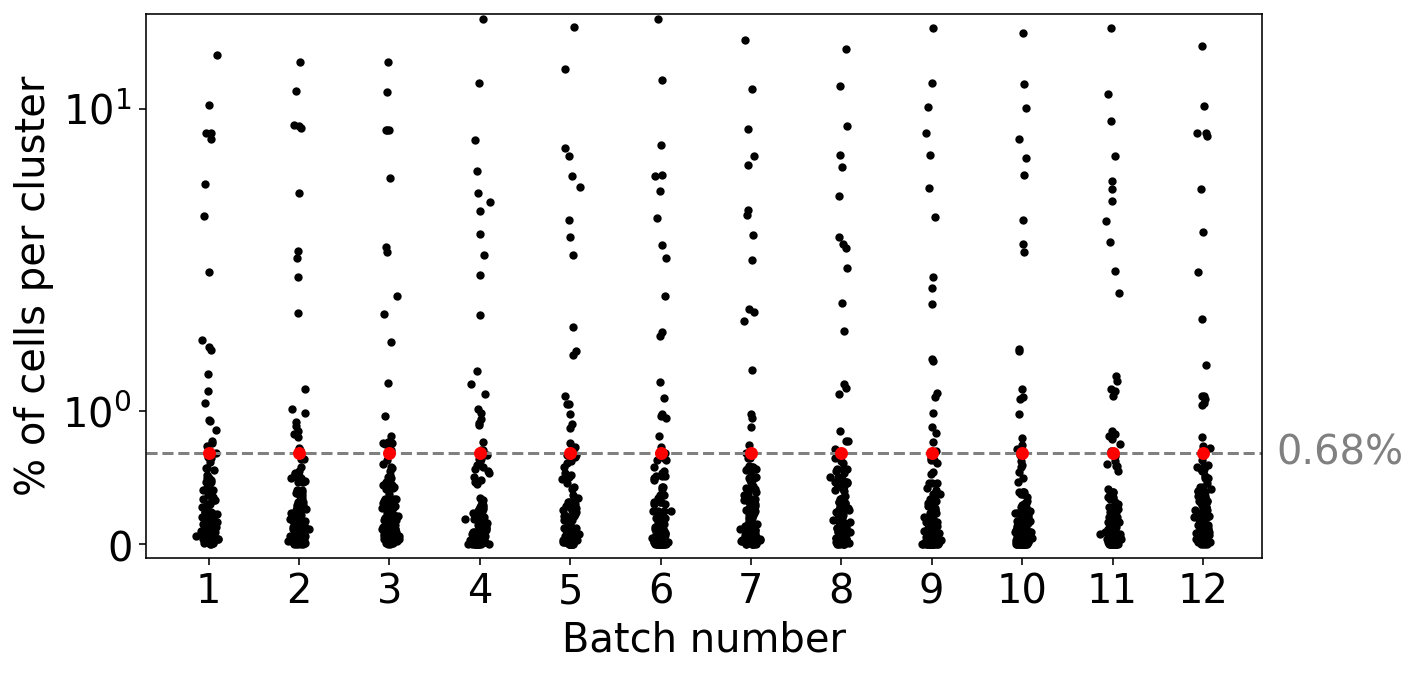

In [251]:
fig, ax = plt.subplots(figsize=(10, 5))

lidx = np.arange(n_batches) + 1

kwd = {
    "xticks" : lidx,
    "xticklabels": lidx,
    "yscale": "symlog",
    "xlabel": "Batch number",
    'ylabel': "% of cells per cluster",
    "ylim": (-0.1)
}

for didx, d in enumerate(data.tolist()):
    x = np.random.normal(1, 0.04, size=len(d)) + didx
    ax.scatter(x, d, color="k", s=10)
    ax.scatter(didx+1, np.mean(d), s=30, color="red", zorder=10)


exp = 1./n_clusters*100
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(1.14,exp, f"{exp:.2f}%", color="grey", transform=trans, ha="right", va="center")
ax.axhline(y=exp, color="grey", linestyle="--")
ax.set(**kwd)
plt.savefig("../../figures/10x_cluster_batch_effect.png",bbox_inches='tight', dpi=300)


fig.show()

# Subclass

In [252]:
s = gene.obs.groupby(["batch","subclass_label"])["batch"].count()

batches = np.sort(gene.obs.batch.unique())

n_clusters = gene.obs.subclass_label.nunique()
n_batches = len(batches)

mat = np.zeros((n_batches, n_clusters))
for bidx, b in enumerate(batches):
    mat[bidx,:] = s[b]

In [253]:
mat.shape

(12, 22)

In [254]:
a = np.matrix([[1, 2],[0,1],[1, 1]])
b = np.array([5,1, 1])
print(a)
print(a/b[:,None])

[[1 2]
 [0 1]
 [1 1]]
[[0.2 0.4]
 [0.  1. ]
 [1.  1. ]]


In [255]:
data = mat/mat.sum(axis=1)[:,None] * 100

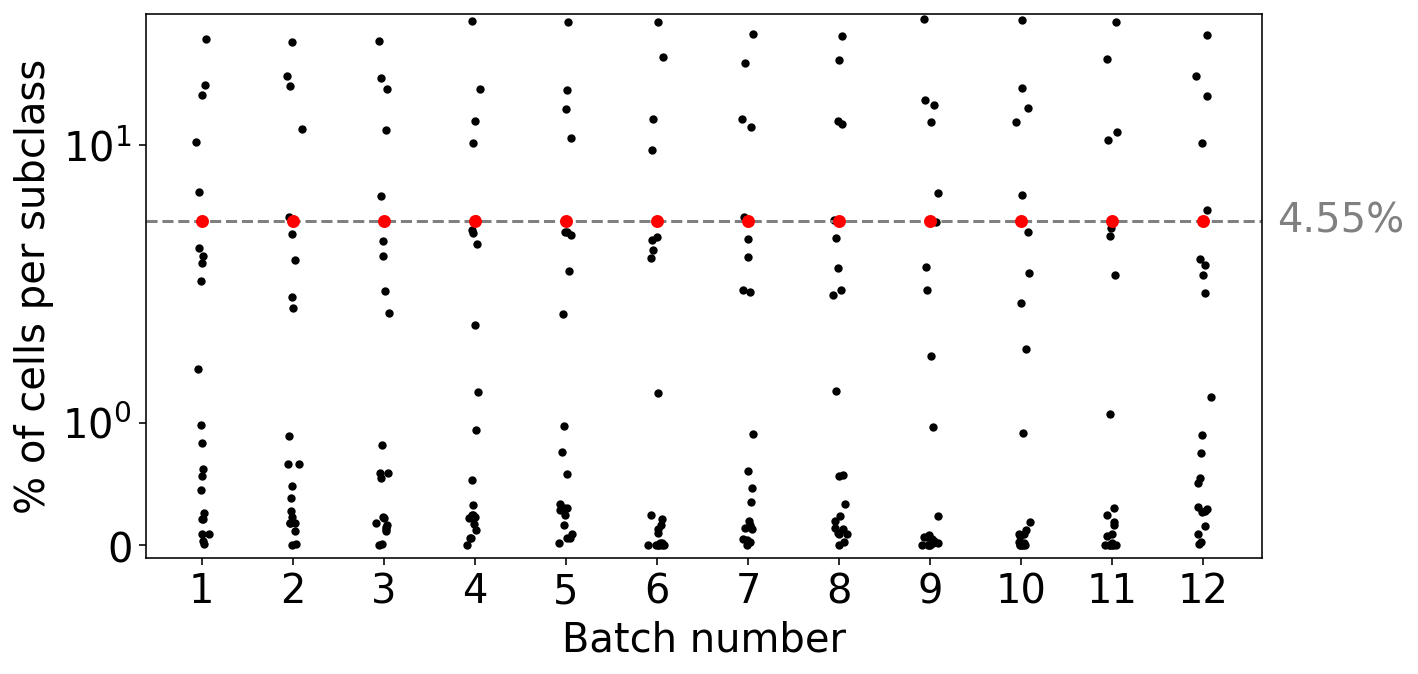

In [256]:
fig, ax = plt.subplots(figsize=(10, 5))

lidx = np.arange(n_batches) + 1

kwd = {
    "xticks" : lidx,
    "xticklabels": lidx,
    "yscale": "symlog",
    "xlabel": "Batch number",
    'ylabel': "% of cells per subclass",
    "ylim": (-0.1)
}

for didx, d in enumerate(data.tolist()):
    x = np.random.normal(1, 0.04, size=len(d)) + didx
    ax.scatter(x, d, color="k", s=10)
    ax.scatter(didx+1, np.mean(d), s=30, color="red", zorder=10)


exp = 1./n_clusters*100
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(1.14,exp, f"{exp:.2f}%", color="grey", transform=trans, ha="right", va="center")
ax.axhline(y=exp, color="grey", linestyle="--")
ax.set(**kwd)

plt.savefig("../../figures/10x_subclass_batch_effect.png",bbox_inches='tight', dpi=300)

fig.show()